In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LinReg_model import PaymentMethodPredictor
from BasicNeuralNet import PaymentMethodNNPredictor

/Users/peterpichler/PycharmProjects/PythonExampleSMEs/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load the order payments dataset from the specified local path
payments_path = 'olist_order_payments_dataset.csv'  # Replace with the actual path to the file
order_payments = pd.read_csv(payments_path)

# Display basic information about the dataset
payments_info = order_payments.info()

# Analyze the distribution of payment methods
payment_methods_distribution = order_payments['payment_type'].value_counts(normalize=True)

# Calculate the average payment value per order
average_payment_value = order_payments['payment_value'].mean()


# Select only numerical columns for the correlation analysis
numerical_order_payments = order_payments.select_dtypes(include=['int64', 'float64'])

# Calculate summary statistics for numerical features
summary_statistics = numerical_order_payments.describe()

# Calculate the distribution of payment installments
installments_distribution = order_payments['payment_installments'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
 5   failed_total_payment  103886 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 4.1+ MB


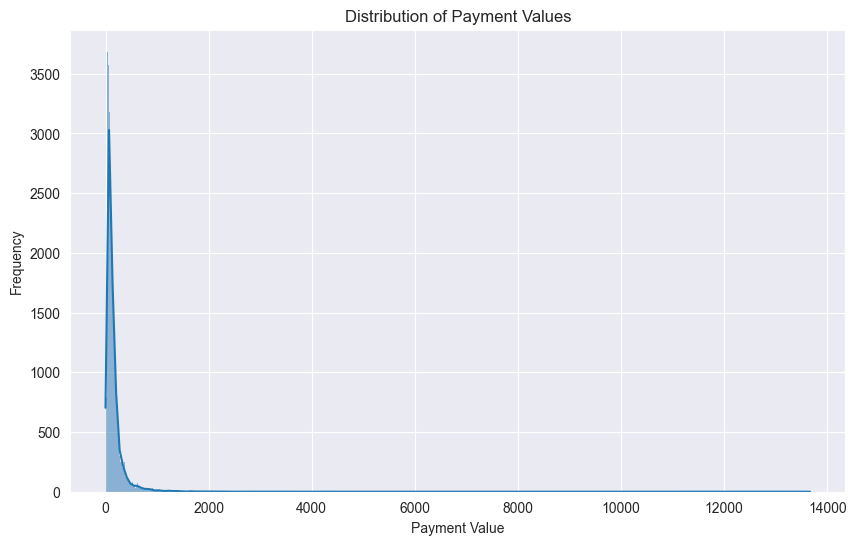

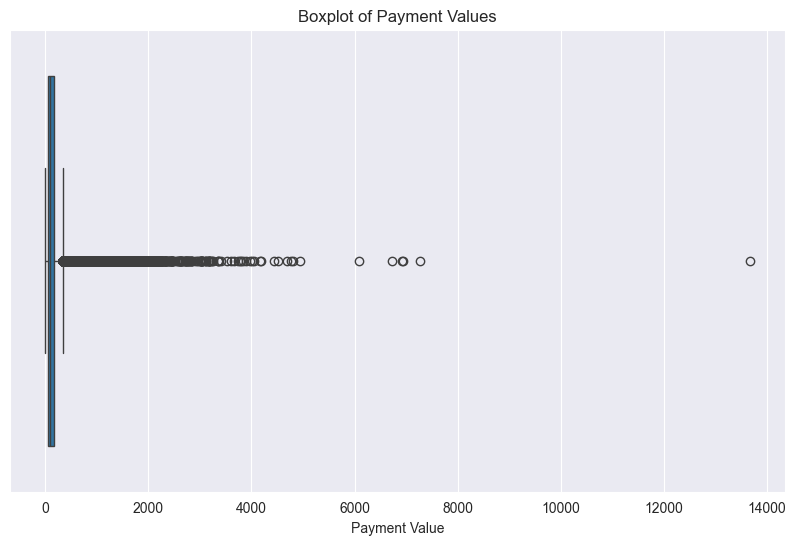

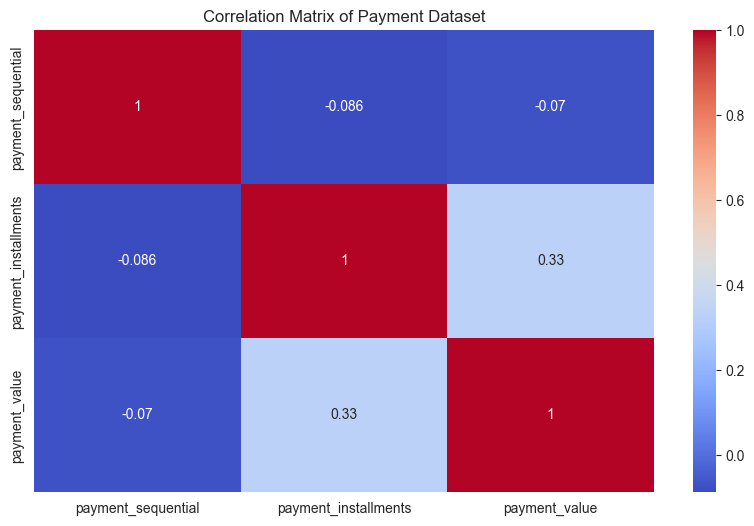

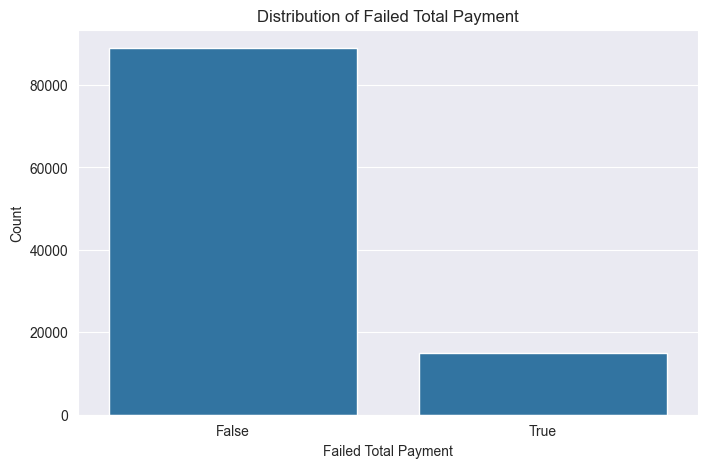

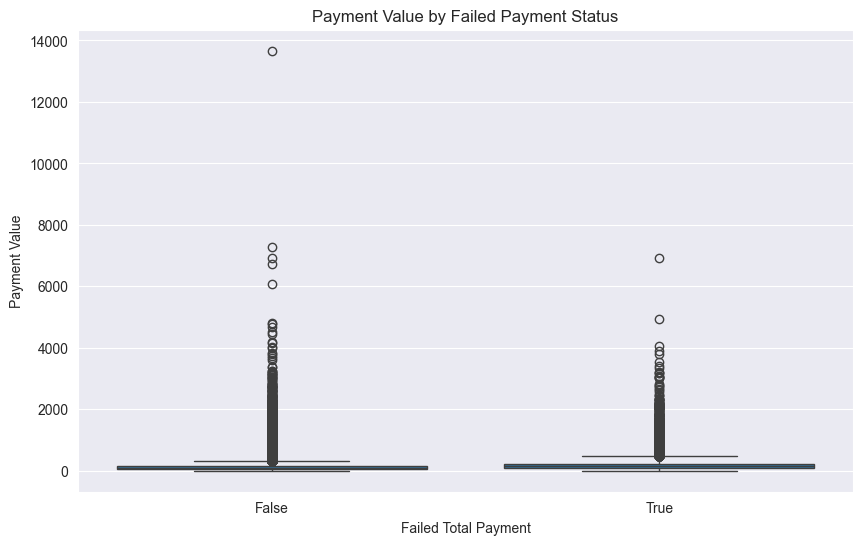

Distribution of Failed Total Payment:
 failed_total_payment
False    0.856381
True     0.143619
Name: proportion, dtype: float64


In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(order_payments['payment_value'], kde=True)
plt.title('Distribution of Payment Values')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.show()

# Plot the boxplot to check for outliers in payment values
plt.figure(figsize=(10, 6))
sns.boxplot(x=order_payments['payment_value'])
plt.title('Boxplot of Payment Values')
plt.xlabel('Payment Value')
plt.show()

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_order_payments.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Payment Dataset')
plt.show()

failed_payment_distribution = order_payments['failed_total_payment'].value_counts(normalize=True)

# Plot the distribution of the 'failed_total_payment'
plt.figure(figsize=(8, 5))
sns.countplot(x=order_payments['failed_total_payment'])
plt.title('Distribution of Failed Total Payment')
plt.xlabel('Failed Total Payment')
plt.ylabel('Count')
plt.show()

# Analysis of payment value by failed payment status
plt.figure(figsize=(10, 6))
sns.boxplot(x='failed_total_payment', y='payment_value', data=order_payments)
plt.title('Payment Value by Failed Payment Status')
plt.xlabel('Failed Total Payment')
plt.ylabel('Payment Value')
plt.show()

# Print the distribution of failed payments
print("Distribution of Failed Total Payment:\n", failed_payment_distribution)


In [ ]:
# Print the results
print("Summary Statistics:\n", summary_statistics)
print("\nInstallments Distribution:\n", installments_distribution)
print("\nCorrelation Matrix:\n", correlation_matrix)


In [4]:
'''Linear Regression model to predict the likelihood of failed payments'''
payments_path = 'olist_order_payments_dataset.csv'  # Replace with the actual path to the file
order_payments = pd.read_csv(payments_path)

#remove the user_id

order_payments = order_payments.drop(['order_id', 'payment_sequential'], axis=1)

# Initialize the PaymentMethodPredictor with the DataFrame and target variable
predictor = PaymentMethodPredictor(order_payments[:50000], 'failed_total_payment')

# Preprocess the data
predictor.preprocess_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = predictor.split_data()

# Train the model
predictor.train_model(X_train, y_train)

# Evaluate the model
accuracy = predictor.evaluate_model(X_test, y_test)
print(f"Final Model accuracy: {accuracy}")

      payment_type  payment_installments  payment_value  failed_total_payment
0      credit_card                     8          99.33                 False
1      credit_card                     1          24.39                  True
2      credit_card                     1          65.71                 False
3      credit_card                     8         107.78                  True
4      credit_card                     2         128.45                 False
...            ...                   ...            ...                   ...
49995  credit_card                     3         149.86                 False
49996  credit_card                     3         159.70                 False
49997  credit_card                     2          22.90                 False
49998  credit_card                     1          71.02                 False
49999       boleto                     1         528.87                  True

[50000 rows x 4 columns]
preprocessing data
Training accuracy: 

In [5]:
'''Neural Network to predict the likelihood of failed payments'''
nn_predictor = PaymentMethodNNPredictor(order_payments[:50000], 'failed_total_payment')

# Preprocess the data
nn_predictor.preprocess_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = nn_predictor.split_data()

# Build the neural network model
nn_predictor.build_model(input_dim=X_train.shape[1], output_dim=y_train.shape[1])

# Train the model
nn_predictor.train_model(X_train, y_train)

# Evaluate the model
nn_predictor.evaluate_model(X_test, y_test)

# To predict the likelihood of failed payments
likelihoods = nn_predictor.model.predict(X_test)[:, 1]

Epoch 1/10
1250/1250 [==============================] - 1s 470us/step - loss: 0.4035 - accuracy: 0.8529
Epoch 2/10
1250/1250 [==============================] - 1s 431us/step - loss: 0.3986 - accuracy: 0.8557
Epoch 3/10
1250/1250 [==============================] - 1s 451us/step - loss: 0.3987 - accuracy: 0.8557
Epoch 4/10
1250/1250 [==============================] - 1s 447us/step - loss: 0.3986 - accuracy: 0.8557
Epoch 5/10
1250/1250 [==============================] - 1s 450us/step - loss: 0.3985 - accuracy: 0.8557
Epoch 6/10
1250/1250 [==============================] - 1s 452us/step - loss: 0.3985 - accuracy: 0.8557
Epoch 7/10
1250/1250 [==============================] - 1s 439us/step - loss: 0.3984 - accuracy: 0.8557
Epoch 8/10
1250/1250 [==============================] - 1s 440us/step - loss: 0.3984 - accuracy: 0.8557
Epoch 9/10
1250/1250 [==============================] - 1s 435us/step - loss: 0.3984 - accuracy: 0.8557
Epoch 10/10
313/313 [==============================] - 0s 334us/